# A Simple Example of Properties of IV estimator when Instruments are Weak

Simulation Design

In [1]:
# Simulation Design

library(hdm)
set.seed(1)
B= 10000 # trials
IVEst = rep(0, B)
n=100
beta = .25   # .2 weak IV
#beta = 1   #   1 strong IV


U =  rnorm(n)  
Z = rnorm(n)  #generate instrument
D = beta*Z + U  #generate endogenougs variable
Y =  D+ U  # the true causal effect is 1


summary(lm(D~Z))  # first stage is very weak here

summary(tsls(x=NULL, d=D, y=Y, z=Z))  #



Call:
lm(formula = D ~ Z)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.32416 -0.60361  0.00536  0.58305  2.29316 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.10885    0.09035   1.205  0.23118   
Z            0.24907    0.09472   2.629  0.00993 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9028 on 98 degrees of freedom
Multiple R-squared:  0.0659,	Adjusted R-squared:  0.05637 
F-statistic: 6.914 on 1 and 98 DF,  p-value: 0.009931


[1] "Estimates and Significance Testing from from tsls"
            Estimate Std. Error t value p value   
d1           0.99626    0.38173   2.610 0.00906 **
(Intercept)  0.10926    0.09824   1.112 0.26608   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




In [7]:
var(U)

[1] 0.8067621

In [4]:
dim(IVEst)

NULL

Note that the instrument is weak here (contolled by $\beta$) -- the t-stat is less than 4.

# Run 1000 trials to evaluate distribution of the IV estimator

In [11]:
# Simulation Design

set.seed(1)
B= 10000 # trials
IVEst = rep(0, B)

for(i in 1:B){
U =  rnorm(n)  
Z = rnorm(n)  #generate instrument
D = beta*Z + U  #generate endogenougs variable
Y =  D+ U  # the true causal effect is 1
IVEst[i] = coef(tsls(x=NULL, d=D, y=Y, z=Z))[1,1]
}



# Plot the Actual Distribution against the Normal Approximation (based on Strong Instrument Assumption)

Rejection Frequency is  0.1401  while we expect it to be .05

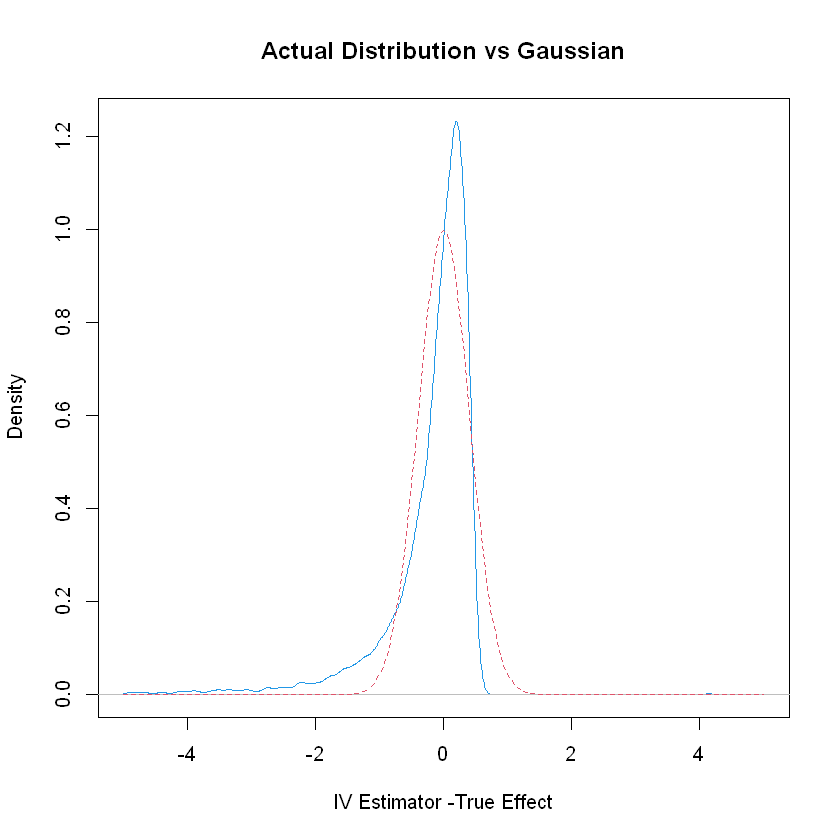

In [12]:
plot(density(IVEst-1, n=1000, from=-5, to=5),col=4, xlim= c(-5, 5),  
     xlab= "IV Estimator -True Effect", main="Actual Distribution vs Gaussian")

val=seq(-5, 5, by=.05)
var = (1/beta^2)*(1/100) # theoretical variance of IV
sd = sqrt(var)
lines(val, dnorm(val, sd=sd), col=2, lty=2)

rejection.frequency = sum(( abs(IVEst-1)/sd > 1.96))/B

cat(c("Rejection Frequency is ", rejection.frequency, " while we expect it to be .05"))

In [25]:
type(val)

ERROR: Error in type(val): could not find function "type"


In [23]:
var

[1] 0.16

In [19]:
a = dnorm(val, sd=sd)
a

[1] 1.173799e-34 5.556302e-34 2.589359e-33 1.187990e-32 5.365959e-32
  [6] 2.386141e-31 1.044622e-30 4.502319e-30 1.910414e-29 7.980551e-29
 [11] 3.282104e-28 1.328881e-27 5.297048e-27 2.078720e-26 8.031045e-26
 [16] 3.054656e-25 1.143844e-24 4.216823e-24 1.530446e-23 5.468459e-23
 [21] 1.923650e-22 6.661947e-22 2.271384e-21 7.624194e-21 2.519484e-20
 [26] 8.196781e-20 2.625362e-19 8.278456e-19 2.569943e-18 7.854380e-18
 [31] 2.363276e-17 7.000533e-17 2.041559e-16 5.861474e-16 1.656784e-15
 [36] 4.610407e-15 1.263068e-14 3.406655e-14 9.045736e-14 2.364688e-13
 [41] 6.085801e-13 1.541970e-12 3.846345e-12 9.445711e-12 2.283680e-11
 [46] 5.435632e-11 1.273734e-10 2.938475e-10 6.673892e-10 1.492281e-09
 [51] 3.285005e-09 7.119272e-09 1.518971e-08 3.190637e-08 6.598108e-08
 [56] 1.343308e-07 2.692440e-07 5.312887e-07 1.032118e-06 1.973977e-06
 [61] 3.716799e-06 6.889856e-06 1.257377e-05 2.259097e-05 3.995935e-05
 [66] 6.958509e-05 1.192966e-04 2.013511e-04 3.345756e-04 5.473291e-04
 [71] 8.814892e-04 1.397654e-03 2.181707e-03 3.352797e-03 5.072620e-03
 [76] 7.555645e-03 1.107962e-02 1.599530e-02 2.273391e-02 3.181045e-02
 [81] 4.382075e-02 5.942975e-02 7.934913e-02 1.043025e-01 1.349774e-01
 [86] 1.719657e-01 2.156933e-01 2.663457e-01 3.237940e-01 3.875307e-01
 [91] 4.566227e-01 5.296916e-01 6.049268e-01 6.801375e-01 7.528436e-01
 [96] 8.204024e-01 8.801633e-01 9.296377e-01 9.666703e-01 9.895942e-01
[101] 9.973557e-01 9.895942e-01 9.666703e-01 9.296377e-01 8.801633e-01
[106] 8.204024e-01 7.528436e-01 6.801375e-01 6.049268e-01 5.296916e-01
[111] 4.566227e-01 3.875307e-01 3.237940e-01 2.663457e-01 2.156933e-01
[116] 1.719657e-01 1.349774e-01 1.043025e-01 7.934913e-02 5.942975e-02
[121] 4.382075e-02 3.181045e-02 2.273391e-02 1.599530e-02 1.107962e-02
[126] 7.555645e-03 5.072620e-03 3.352797e-03 2.181707e-03 1.397654e-03
[131] 8.814892e-04 5.473291e-04 3.345756e-04 2.013511e-04 1.192966e-04
[136] 6.958509e-05 3.995935e-05 2.259097e-05 1.257377e-05 6.889856e-06
[141] 3.716799e-06 1.973977e-06 1.032118e-06 5.312887e-07 2.692440e-07
[146] 1.343308e-07 6.598108e-08 3.190637e-08 1.518971e-08 7.119272e-09
[151] 3.285005e-09 1.492281e-09 6.673892e-10 2.938475e-10 1.273734e-10
[156] 5.435632e-11 2.283680e-11 9.445711e-12 3.846345e-12 1.541970e-12
[161] 6.085801e-13 2.364688e-13 9.045736e-14 3.406655e-14 1.263068e-14
[166] 4.610407e-15 1.656784e-15 5.861474e-16 2.041559e-16 7.000533e-17
[171] 2.363276e-17 7.854380e-18 2.569943e-18 8.278456e-19 2.625362e-19
[176] 8.196781e-20 2.519484e-20 7.624194e-21 2.271384e-21 6.661947e-22
[181] 1.923650e-22 5.468459e-23 1.530446e-23 4.216823e-24 1.143844e-24
[186] 3.054656e-25 8.031045e-26 2.078720e-26 5.297048e-27 1.328881e-27
[191] 3.282104e-28 7.980551e-29 1.910414e-29 4.502319e-30 1.044622e-30
[196] 2.386141e-31 5.365959e-32 1.187990e-32 2.589359e-33 5.556302e-34
[201] 1.173799e-34

In [17]:
val

[1] -5.00 -4.95 -4.90 -4.85 -4.80 -4.75 -4.70 -4.65 -4.60 -4.55 -4.50 -4.45
 [13] -4.40 -4.35 -4.30 -4.25 -4.20 -4.15 -4.10 -4.05 -4.00 -3.95 -3.90 -3.85
 [25] -3.80 -3.75 -3.70 -3.65 -3.60 -3.55 -3.50 -3.45 -3.40 -3.35 -3.30 -3.25
 [37] -3.20 -3.15 -3.10 -3.05 -3.00 -2.95 -2.90 -2.85 -2.80 -2.75 -2.70 -2.65
 [49] -2.60 -2.55 -2.50 -2.45 -2.40 -2.35 -2.30 -2.25 -2.20 -2.15 -2.10 -2.05
 [61] -2.00 -1.95 -1.90 -1.85 -1.80 -1.75 -1.70 -1.65 -1.60 -1.55 -1.50 -1.45
 [73] -1.40 -1.35 -1.30 -1.25 -1.20 -1.15 -1.10 -1.05 -1.00 -0.95 -0.90 -0.85
 [85] -0.80 -0.75 -0.70 -0.65 -0.60 -0.55 -0.50 -0.45 -0.40 -0.35 -0.30 -0.25
 [97] -0.20 -0.15 -0.10 -0.05  0.00  0.05  0.10  0.15  0.20  0.25  0.30  0.35
[109]  0.40  0.45  0.50  0.55  0.60  0.65  0.70  0.75  0.80  0.85  0.90  0.95
[121]  1.00  1.05  1.10  1.15  1.20  1.25  1.30  1.35  1.40  1.45  1.50  1.55
[133]  1.60  1.65  1.70  1.75  1.80  1.85  1.90  1.95  2.00  2.05  2.10  2.15
[145]  2.20  2.25  2.30  2.35  2.40  2.45  2.50  2.55  2.60  2.65  2.70  2.75
[157]  2.80  2.85  2.90  2.95  3.00  3.05  3.10  3.15  3.20  3.25  3.30  3.35
[169]  3.40  3.45  3.50  3.55  3.60  3.65  3.70  3.75  3.80  3.85  3.90  3.95
[181]  4.00  4.05  4.10  4.15  4.20  4.25  4.30  4.35  4.40  4.45  4.50  4.55
[193]  4.60  4.65  4.70  4.75  4.80  4.85  4.90  4.95  5.00

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


Rejection Frequency is  0.1401  while we expect it to be .05

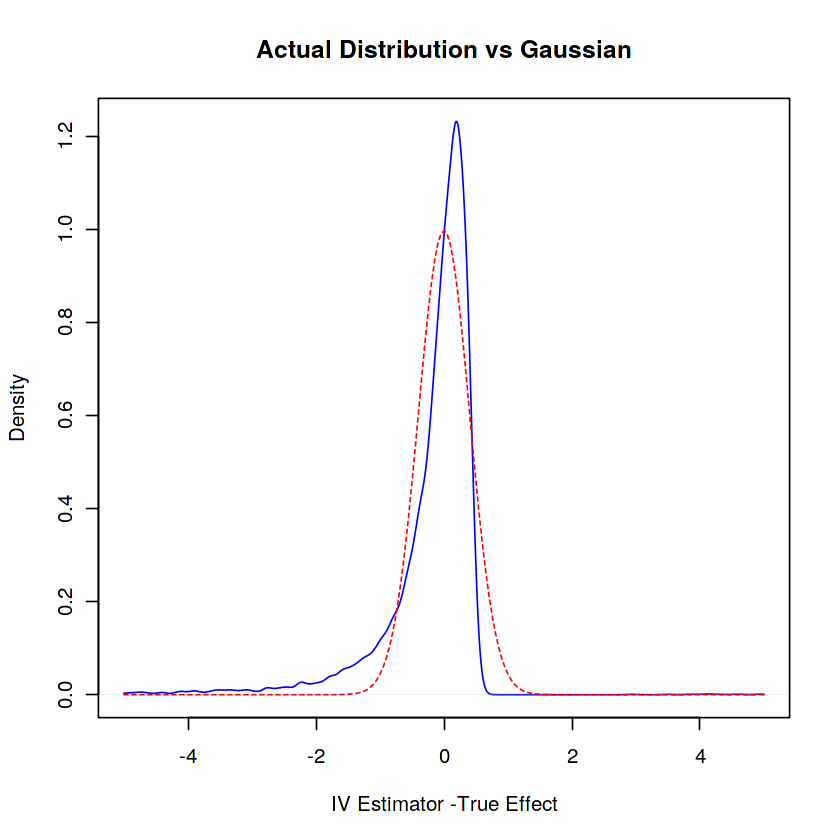

In [3]:
rejection.frequency = sum(( abs(IVEst-1)/sd > 1.96))/B

cat(c("Rejection Frequency is ", rejection.frequency, " while we expect it to be .05"))

# Some Help Functions

In [4]:
help(tsls)

In [5]:
help(density)